<a href="https://colab.research.google.com/github/aadityasomani/Aadi/blob/master/Lesson_38_Customised_Plots_Aditya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 38: Customised Plots

---

### Teacher-Student Tasks

In this class, we will learn to create time series plots and customize the `matplotlib` plots to impactfully and effectively convey some information through plots. 

Let's quickly run the codes covered in the previous classes and begin this class from the **Task 1: Customised `matplotlib` Plots** section.

---

### Recap

Run the code cell below to load the dataset and apply the operations on the DataFrame that were covered in the previous classes.

In [1]:
# Run the code cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1) 

# Dropping the null values.
df = df.dropna()

# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median() # Get the median value for each column after excluding -200.
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Get the columns in the original DataFrame.
df.columns

Index(['DateTime', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year', 'Month', 'Day',
       'Day Name'],
      dtype='object')

The description for all the columns containing data for air pollutants, temperature, relative humidity and absolute humidity is provided below.


|Columns|Description|
|-|-|
|PT08.S1(CO)|PT08.S1 (tin oxide) hourly averaged sensor response (nominally $\text{CO}$ targeted)|
|C6H6(GT)|True hourly averaged Benzene concentration in $\frac{\mu g}{m^3}$|
|PT08.S2(NMHC)|PT08.S2 (titania) hourly averaged sensor response (nominally $\text{NMHC}$ targeted)|
|PT08.S3(NOx)|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)|
|PT08.S4(NO2)|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_x$ targeted)|
|PT08.S5(O3) |PT08.S5 (indium oxide) hourly averaged sensor response (nominally $\text{O}_3$ targeted)|
|T|Temperature in Â°C|
|RH|Relative Humidity (%)|
|AH|AH Absolute Humidity|

---

#### Task 1: Customised `matplotlib` Plots

Let's create a line plot to trace the monthly median concentration of air pollutants, temperature, relative humidity and average humidity in 2004 and 2005.

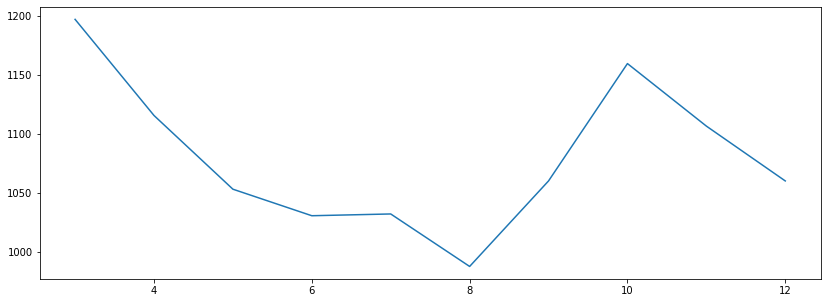

In [3]:
# S1.1 Create a line plot for the monthly median concentration of CO in 2004.
group_2004_month=aq_2004_df.groupby(by='Month',as_index=False)
group_2005_month=aq_2005_df.groupby(by='Month',as_index=False)
plt.figure(figsize=(14,5))
plt.plot(group_2004_month.median()['Month'],group_2004_month.median()['PT08.S1(CO)'])
plt.show()

You can add the following features to the above plot:

1. Add a style to make the plot look more attractive using the `plt.style.use()` function. E.g., You can create the above plot in the `ggplot` style which is one of the popular data-visualization modules in **R** language just like `matplotlib` is in Python. If you like to work on a Colab notebook in the dark mode, then use the `dark_background` style.

2. Add a title to the plot using the `plt.title()` function. Let's give the above graph **Monthly Median CO Concentration In 2004** title.

3. Add the labels for the coordinate axes using the `plt.xlabel()` & `plt.ylabel()` functions. Put the **Month** label on the `x-axis` and the **Sensor Response** label on the `y-axis`.

4. Add a grid using the `plt.grid()` function by passing `True` as an input to the function.

So let's make a `ggplot` style plot. Also, let's label the coordinate axes and add a grid:


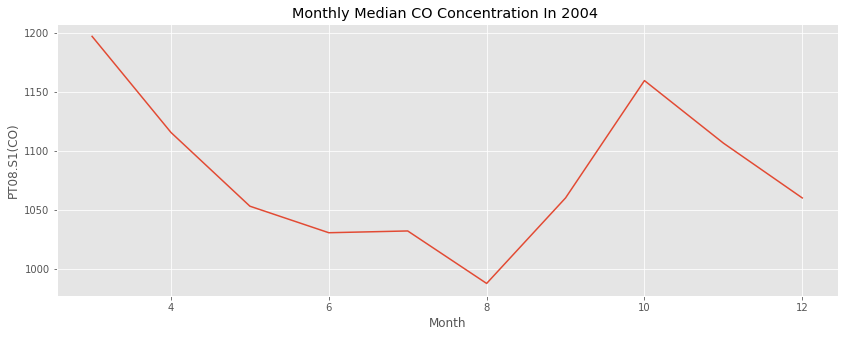

In [5]:
# S1.2: Add the 'ggplot' style and a title in the above plot. Also, label the coordinate axes and add a grid.
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.title("Monthly Median CO Concentration In 2004 ")
plt.plot(group_2004_month.median()['Month'],group_2004_month.median()['PT08.S1(CO)'])
plt.xlabel("Month")
plt.ylabel("PT08.S1(CO)")
plt.grid(True)
plt.show()

Once you have set a style for a `matplotlib` plot object, all the forthcoming `matplotlib` plots will get created with the same style. You cannot revert back to the original style, unless you remove the code for the current style and re-execute all the codes.

To get a list of all the available `matplotlib` styles, click on the link provided below and choose your favourite one:

[The `matplotlib` Style Sheet Reference](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)

If you want to change the colour of the line in a line plot and also want to change the line type, then you can pass an additional input to the `plt.plot()` function. Let the third input be `'g-o'` where `'g'` denotes colour green and `'-o'` denotes line plot will have filled circles at the turning points.

**Note:** `'-o'` and `'o-'` mean the same thing.

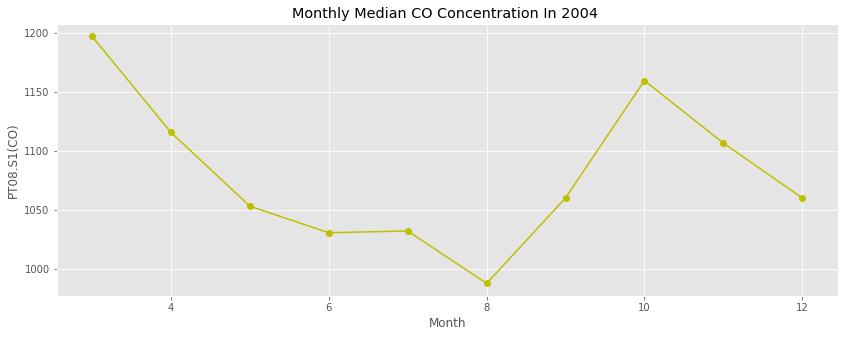

In [8]:
# S1.3: In the above plot, pass 'g-o' as the third parameter.
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.title("Monthly Median CO Concentration In 2004 ")
plt.plot(group_2004_month.median()['Month'],group_2004_month.median()['PT08.S1(CO)'],'y-o')
plt.xlabel("Month")
plt.ylabel("PT08.S1(CO)")
plt.grid(True)
plt.show()

You can specify different colour values in different ways but the one we used is the easiest one. To know what other colours you can specify and how, click on the link provided below.

[The `matplotlib` Colours](https://matplotlib.org/3.2.1/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py)

The `x-axis` represents the month values as numeric values. You can replace the numeric values with the actual month names using the `plt.xticks()` function. To do this:

1. Create a list of values which must replace the original `x-axis` values.

2. Inside the `xticks()` function, pass two parameters:

  - `ticks` whose value should be the original `x-axis` indices.

  -  `labels` whose value should be the new indices to replace the original `x-axis` indices.

  - Additionally, let's also pass a third parameter called `rotation` to rotate the `x-axis` labels or indices by 45 degrees.

Let's change the style to `grayscale`. It is one of the popular styles used to create graphs to put them in academic research papers/journals. A graph in a `grayscale` style looks much better without having a grid. So, let's set its input equal to `False` this time.

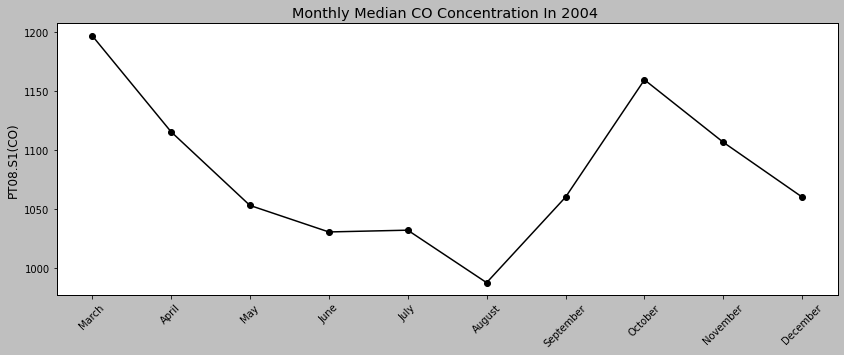

In [13]:
# S1.4: In the above plot, replace the numeric values in the 'x-axis' with the actual month names.
month_2004=aq_2004_df['DateTime'].dt.month_name().unique()
plt.style.use('grayscale')
plt.figure(figsize=(14,5))
plt.title("Monthly Median CO Concentration In 2004 ")
plt.plot(group_2004_month.median()['Month'],group_2004_month.median()['PT08.S1(CO)'],'-o')
plt.xticks(ticks=group_2004_month.median()['Month'],labels=month_2004,rotation=45)
plt.ylabel("PT08.S1(CO)")
plt.grid(False)
plt.show()

Let's also create a graph for the monthly median $\text{CO}$ concentration in the year 2005 to compare the same in the year 2004 alongside. To do this, you just have to use the `plt.plot()` function again immediately after the same function used for the year 2004.

Also, to do this comparison you need to create DataFrames for the months that are common to both the year 2004 and 2005. So let's first find out the common months.


In [16]:
# S1.5: In the dataset, find out for which months the records are present for both 2004 and 2005 years.
# Create a list to store only the common month numbers
common_months=[]
for month in aq_2005_df['Month'].unique():
    if month in aq_2004_df['Month'].unique():
        common_months.append(month)
# Create a list to store only the common month names
common_months_name=[]
for month_name in aq_2005_df['DateTime'].dt.month_name().unique():
    if month_name in aq_2004_df['DateTime'].dt.month_name().unique():
        common_months_name.append(month_name)
# Print the lists
print(f'Common Month={common_months}\n Common Month Names{common_months_name}')

Common Month=[3, 4]
 Common Month Names['March', 'April']


So only for March and April months, we have records for both the years 2004 and 2005.

Now, let's create a DataFrame containing records only for the March and April months for the year 2004.

In [17]:
# S1.6: Create a DataFrame for the year 2004 that contains records for only March and April.
aq_2004_common_months=aq_2004_df[aq_2004_df['Month']<5]
print(aq_2004_common_months)

                DateTime  PT08.S1(CO)  C6H6(GT)  ...  Month  Day   Day Name
0    2004-03-10 18:00:00       1360.0      11.9  ...      3   10  Wednesday
1    2004-03-10 19:00:00       1292.0       9.4  ...      3   10  Wednesday
2    2004-03-10 20:00:00       1402.0       9.0  ...      3   10  Wednesday
3    2004-03-10 21:00:00       1376.0       9.2  ...      3   10  Wednesday
4    2004-03-10 22:00:00       1272.0       6.5  ...      3   10  Wednesday
...                  ...          ...       ...  ...    ...  ...        ...
1225 2004-04-30 19:00:00       1626.0      26.9  ...      4   30     Friday
1226 2004-04-30 20:00:00       1449.0      19.5  ...      4   30     Friday
1227 2004-04-30 21:00:00       1363.0      15.1  ...      4   30     Friday
1228 2004-04-30 22:00:00       1371.0      14.6  ...      4   30     Friday
1229 2004-04-30 23:00:00       1406.0      13.7  ...      4   30     Friday

[1230 rows x 14 columns]


Now, repeat the above exercise for the year 2005.

In [18]:
# S1.7: Create a DataFrame for the year 2005 that contains records for only March and April.
aq_2005_common_months=aq_2005_df[aq_2005_df['Month']>2]
print(aq_2005_common_months)

                DateTime  PT08.S1(CO)  C6H6(GT)  ...  Month  Day  Day Name
8526 2005-03-01 00:00:00        766.0       1.2  ...      3    1   Tuesday
8527 2005-03-01 01:00:00        762.0       0.9  ...      3    1   Tuesday
8528 2005-03-01 02:00:00        736.0       0.6  ...      3    1   Tuesday
8529 2005-03-01 03:00:00        715.0       0.2  ...      3    1   Tuesday
8530 2005-03-01 04:00:00        716.0       0.2  ...      3    1   Tuesday
...                  ...          ...       ...  ...    ...  ...       ...
9352 2005-04-04 10:00:00       1314.0      13.5  ...      4    4    Monday
9353 2005-04-04 11:00:00       1163.0      11.4  ...      4    4    Monday
9354 2005-04-04 12:00:00       1142.0      12.4  ...      4    4    Monday
9355 2005-04-04 13:00:00       1003.0       9.5  ...      4    4    Monday
9356 2005-04-04 14:00:00       1071.0      11.9  ...      4    4    Monday

[831 rows x 14 columns]


Next we need to create a grouped DataFrame having the median concentration valeus for each column for April and March months for the year 2004.

In [19]:
# S1.8: Group the DataFrame for the year 2004 such that we have monthly median values for March and April.
group_2004_common_months=group_2004_month.median()[group_2004_month.median()['Month']<5]
print(group_2004_common_months)

   Month  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...    RH       AH    Year   Day
0      3       1197.0      8.65          926.0  ...  52.2  0.79205  2004.0  21.0
1      4       1115.5      8.80          931.0  ...  50.1  0.92410  2004.0  15.5

[2 rows x 12 columns]


Now repeat the above exercise for the year 2005.

In [20]:
# S1.9: Group the DataFrame for the year 2005 such that we have monthly median values for March and April.
group_2005_common_months=group_2005_month.median()[group_2005_month.median()['Month']>2]
print(group_2005_common_months)

   Month  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...    RH      AH    Year   Day
2      3       1126.0       6.6          841.0  ...  51.8  0.7834  2005.0  16.0
3      4        925.0       3.3          669.0  ...  35.6  0.5977  2005.0   2.0

[2 rows x 12 columns]


Now we are ready to do a comparison between the year 2004 and 2005 records through plots.

Also, let's change the title to **Comparing Monthly Median CO Concentrations in 2004 and 2005** with help of the following steps:

1. Use the `plt.plot()` function in succession to create multiple plots and compare them in one plot.

2. Give different colors to the plots to distinguish them ny passing `'ro-'` and `go--` parameters in the `plt.plot()` function. `'ro-'` creates a continuous single red colored line segments and `go--` creates  a green colored  hyphenated lines because of `--` value. The lowercase letter `o` ensures that the turning points in the plots are represented by filled circles.

3. Pass `2004` and `2005` to the `label` parameter to label the plots and distinctly identify them. In other words, they are legends to identify distinct plots.

4. Display the labels of the plots on the graph to distinguish between the plots using the `plt.legend()` function. 


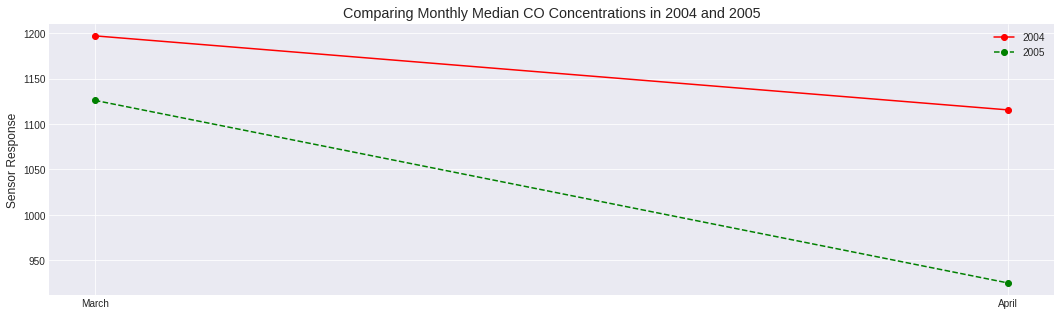

In [21]:
# S1.10: Create a line plot for the monthly median CO concentrations for both the years. Use the 'seaborn-dark' style this time. 
plt.style.use('seaborn-dark')
plt.figure(figsize=(18,5))
plt.title("Comparing Monthly Median CO Concentrations in 2004 and 2005")
plt.plot(group_2004_common_months['Month'],group_2004_common_months['PT08.S1(CO)'],"ro-",label="2004")
plt.plot(group_2005_common_months['Month'],group_2005_common_months['PT08.S1(CO)'],"go--",label="2005")
plt.ylabel("Sensor Response")
plt.xticks(ticks=group_2004_common_months['Month'],labels=common_months_name)
plt.legend()
plt.grid(True)
plt.show()

You can see that the plots for both the years seems to be superimposed on top of each other.


Now, let's create a month-wise comparison plot for all the air pollutants concentration, temperature, relative humidity, and absolute humidity. This time, let's use the `fivethirtyeight` style and rotate the `x-axis` labels or indices by 45 degrees:

In [ ]:
# S1.11: Create a month-wise comparison plot for all the air pollutants concentration, temperature, relative humidity and absolute humidity.
plt.style.use("fivethirtyeight")
for col in group_2004_common_months.columns[1:-2]:
    plt.figure(figsize=(18,5))
    plt.title("Comparing Monthly Median  in 2004 and 2005")
    plt.plot(common_months,group_2004_common_months[col],"ro-",label="2004")
    plt.plot(common_months,group_2005_common_months[col],"go--",label="2005")
    plt.ylabel(col)
    plt.xticks(ticks=group_2004_common_months['Month'],labels=common_months_name)
    plt.legend()
    plt.grid(True)
    plt.show()

From the above graphs, we can see that for the same months in the year 2004 and 2005, the median concentrations were higher in the year 2004. This suggests that the air quality was probably better in 2005 in March and April compared to the year 2004 for the same months.

---

#### Task 2: Time-Series Line Plots

Now, let's create a time series plot using the `plt.plot()` function to visualise the daily average concentration of air pollutants, temperature, relative humidity and absolute humidity. 

Let's create a user-defined function which creates a line plot and takes care of plot attributes as well. The function should take the following inputs:

1. Style of a `matplotlib` plot.

2. Width of the plot.

3. Height of the plot.

4. The Pandas series whose values are to be plotted on the `x-axis`.

5. The Pandas series whose values are to be plotted on the `y-axis`.

6. The year value (either 2004 or 2005) for which the plot needs to be created.

7. The colour of the plot.

Let's start creating the a user-defined `line_plot()` function with help of the following steps:

1. The function takes the required seven inputs as mentioned above.

2. Pass the `style` attribute to the `plt.style.use()` function.

3. Pass the `width` and `height` attributes to the `plt.figure()` functions.

4. Create the title for each plot using the `plt.title()` function. Get the column header of a Pandas series using the `name` attribute.  E.g., the `name` attribute when applied on `aq_2004_df['DateTime']` series will return `'DateTime'` as an output.

5. Create a line plot between the `x_series` and `y_series` using the `plt.plot()` function. Pass the `color` attribute as the third parameter.

6. Rotate the `x-axis` labels or indices by 45 degrees using the `plt.xticks()` function. 

7. Create grid for the line plots in the background using the `plt.grid(True)` function. 

8. Display the plot using the `plt.show()` function.

In [23]:
# S2.1 Create a user-defined function to make a line plot between two series & also allows a user to change the plot attributes on fly.
def line_plot(style,width,height,x_series,y_series,year,color):
    plt.style.use(style)
    plt.figure(figsize=(width,height))
    plt.title(f'\nTime-Series Plot For {y_series.name} in {year}')
    plt.plot(x_series,y_series,color)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()




The function then sets the style of the line plot, its dimensions, its title, creates a plot, rotates the x-axis labels by 45 degrees, and sets a grid.

Now, let's apply this function to the 2004 DataFrame:

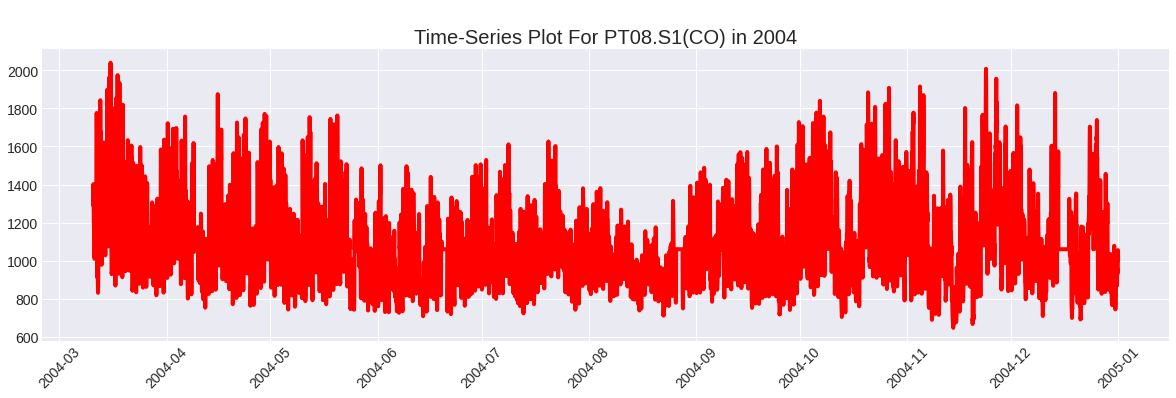

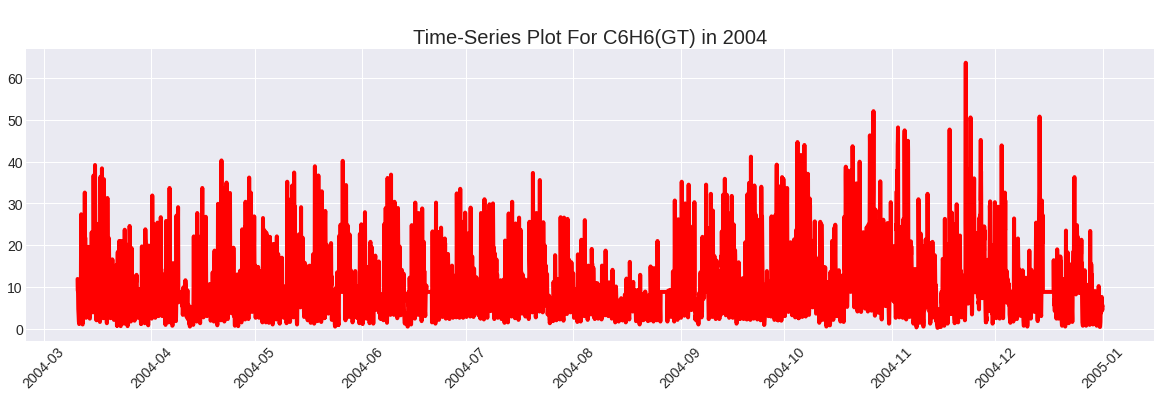

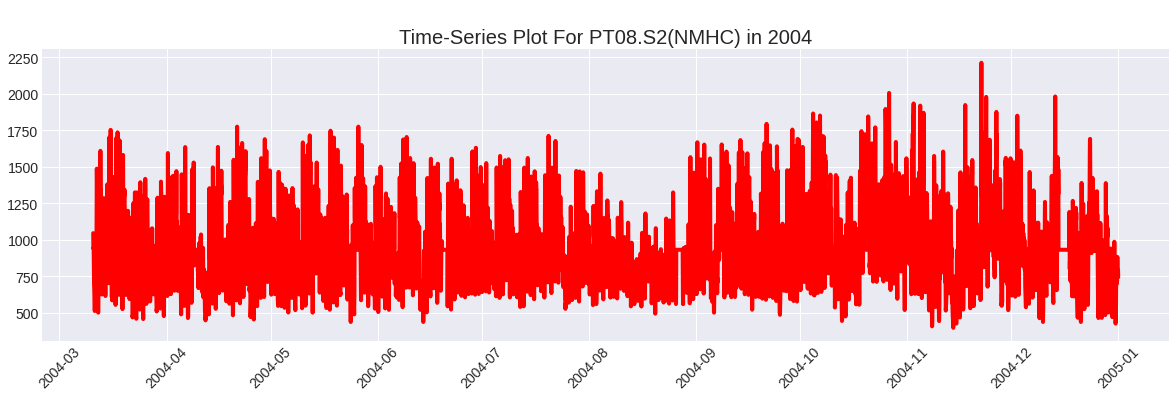

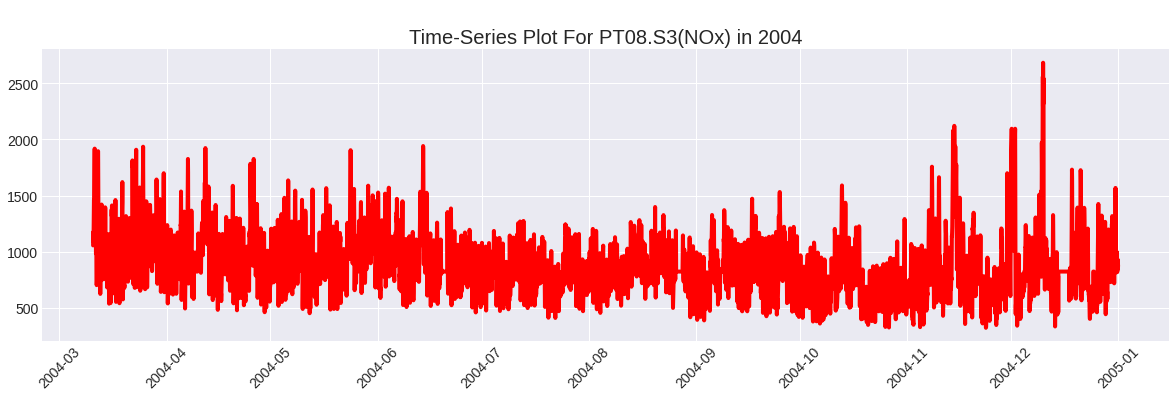

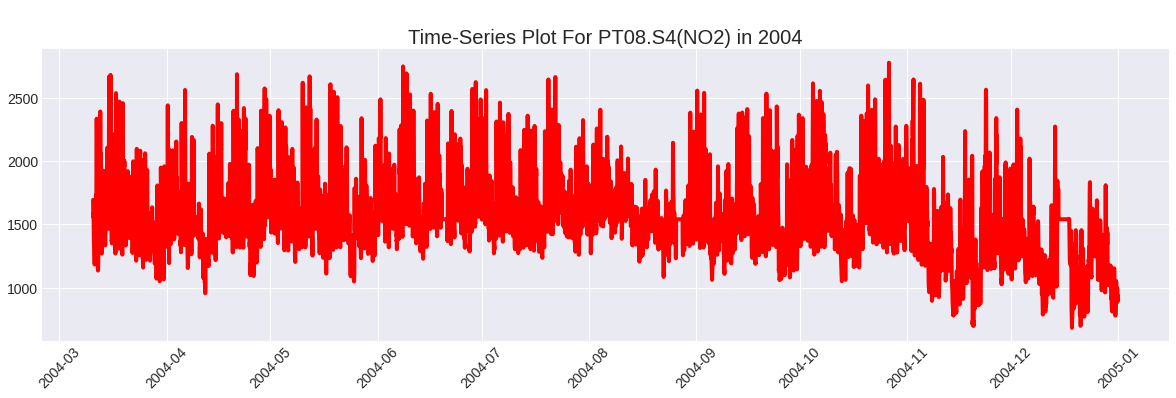

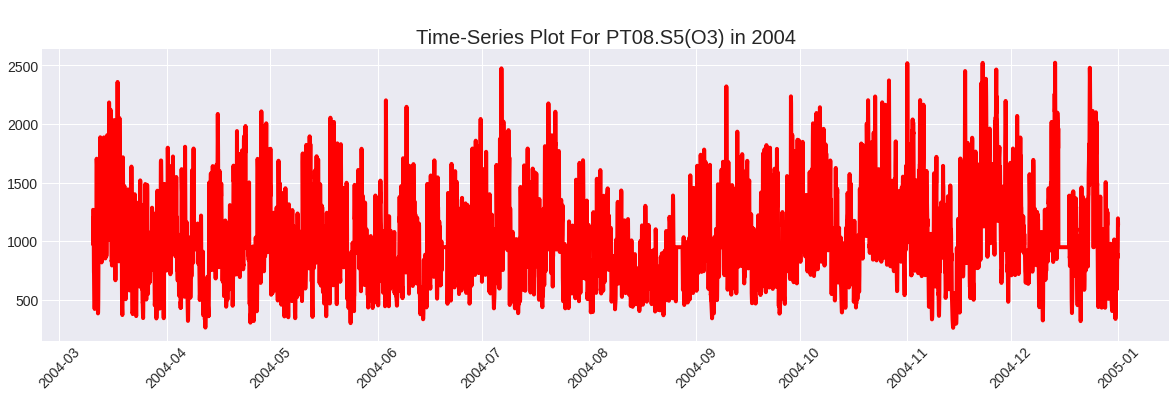

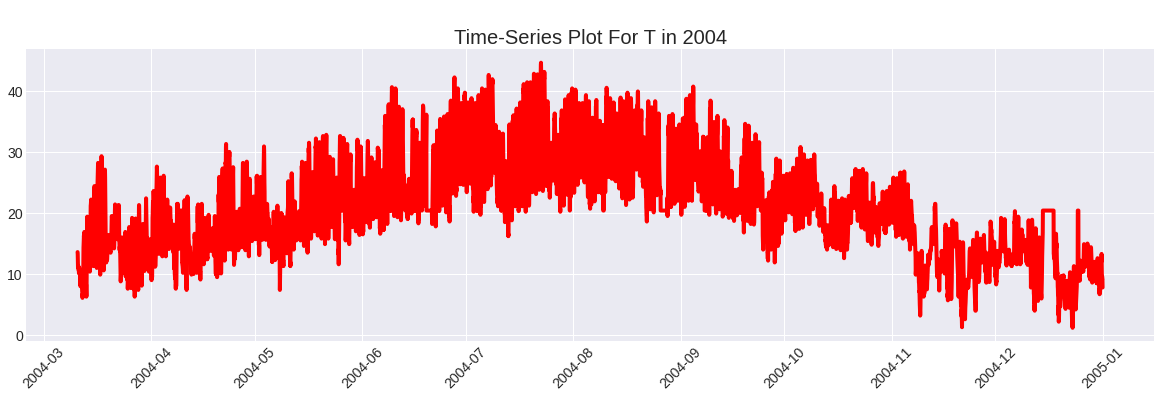

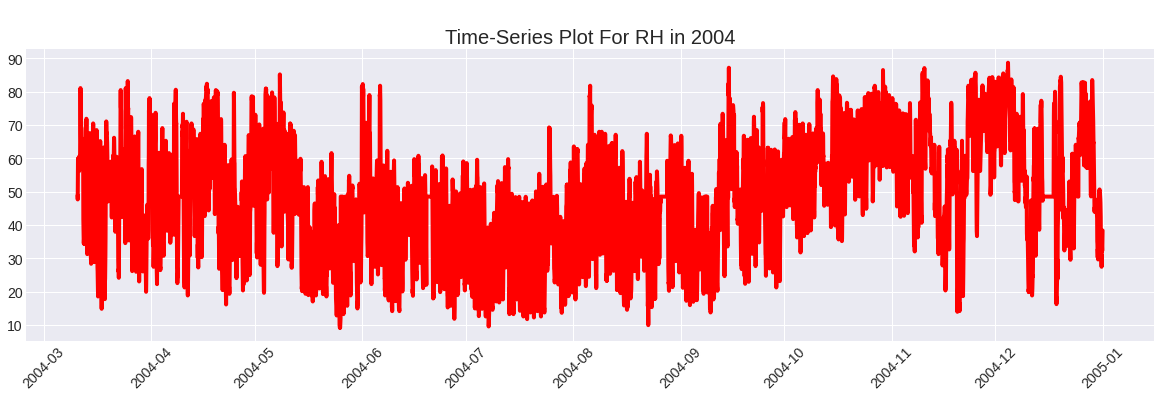

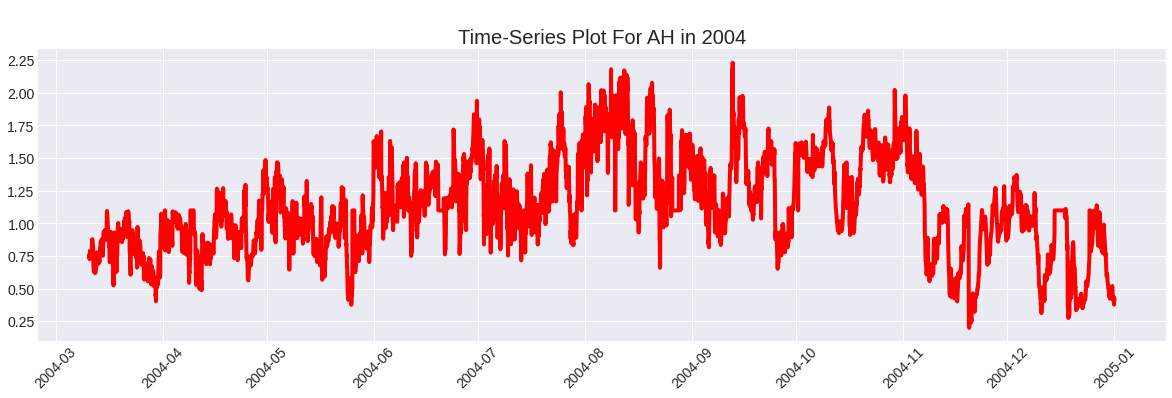

In [25]:
# S2.2: Create a line plot for all the air pollutants concentrations, temperature, relative & absolute humidity for the year 2004.
# This time use the 'seaborn-dark' style and red colour.
for col in aq_2004_df.columns[1:-4]:
    line_plot("seaborn-dark",18,5,aq_2004_df['DateTime'],aq_2004_df[col],2004,'r')

Let's also create the same plots for the year 2005.

In [ ]:
# S2.3: Create a line plot for all the air pollutants concentrations, temperature, relative and absolute humidity for the year 2005.
# This time use the 'dark_background' style and yellow colour.
for col in aq_2004_df.columns[1:-4]:
    line_plot("dark_background",18,5,aq_2004_df['DateTime'],aq_2004_df[col],2005,'r')

---

#### Task 3: Time-Series Multivariate Boxplots

Let's now create time-series boxplots to visualize the spread of values for each column in a given month in a given year. But before that let's concatenate both the 2004 and 2005 year DataFrames to obtain one DataFrame.

**The `pd.concat()` Function**

To concatenate two or more DataFrames having the same columns, use the `pd.concat()` function. The DataFrames to be concatenated are passed as a list of DataFrames.

**Syntax of `concat()` function:** `pd.concat([df1, df2, df3 ... dfN])`

Where `df1, df2, df3 ... dfN` are `N` different DataFrames having the same columns. 



In [27]:
# S3.1: Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df=pd.concat([aq_2004_df,aq_2005_df])
df.head()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday


In [28]:
# S3.2 Find the number of rows and columns in the concatenated DataFrame.
df.shape

(9357, 14)

Let's create a boxplot for month-wise variation in temperature. 

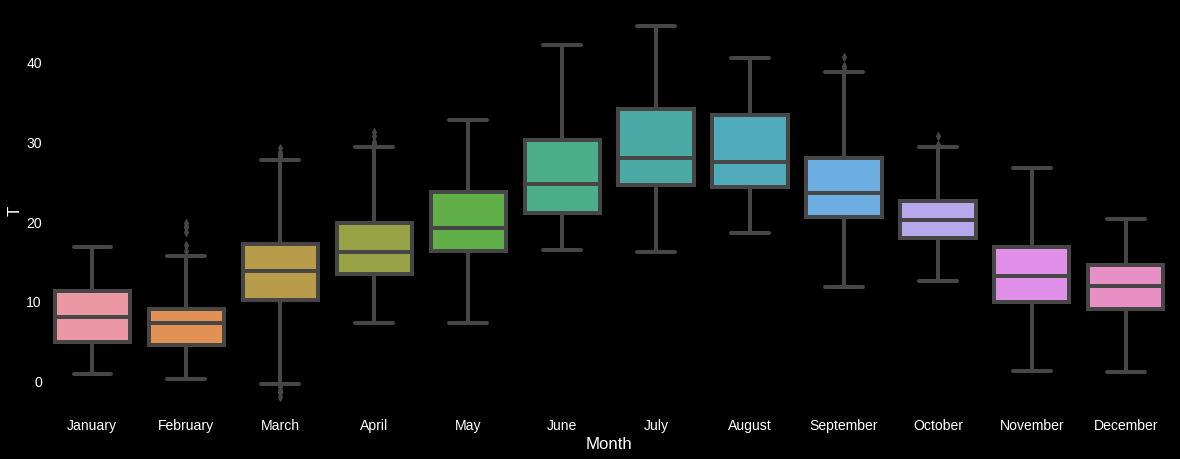

In [29]:
# S3.3: Create a boxplot for month-wise variation in temperature. 
months=df['DateTime'].dt.month_name().unique()
plt.figure(figsize=(18,7))
sns.boxplot(x='Month',y='T',data=df)
plt.xticks(ticks=[i for i in range(12)],labels=list(months[-2:])+list(months[:-2]))
plt.show()

We can split the above boxplots by year for each month by passing the `Year` column as a value to the `hue` parameter inside the `sns.boxplot()` function.

The `hue` parameter determines which column in the data frame should be used for color encoding. Adding `hue='Year'` tells `seaborn` that you want to color the data points for year `2004` and `2005` differently. 

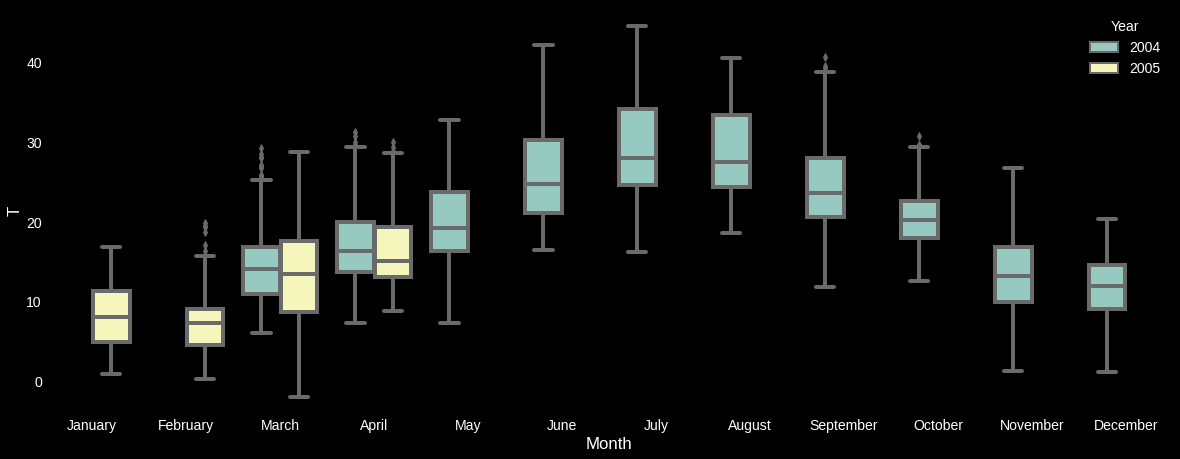

In [30]:
# S3.4: Create a boxplot for month-wise variation in temperature split by year. 
months=df['DateTime'].dt.month_name().unique()
plt.figure(figsize=(18,7))
sns.boxplot(x='Month',y='T',hue='Year',data=df)
plt.xticks(ticks=[i for i in range(12)],labels=list(months[-2:])+list(months[:-2]))
plt.show()

In the above plot, we have passed the `Year` column or series as the third parameter inside the `sns.boxplot()` function to split the boxplots for each month by years.

Now, you create the box plot for month-wise concentrations of all the air pollutants, temperature and relative humidity. Make sure that you split the boxplots for each month by year.

Also, ensure that the `x-axis` labels or indices are labelled as actual month names and they are rotated by 45 degrees. Don't forget to provide appropriate titles to the boxplots.

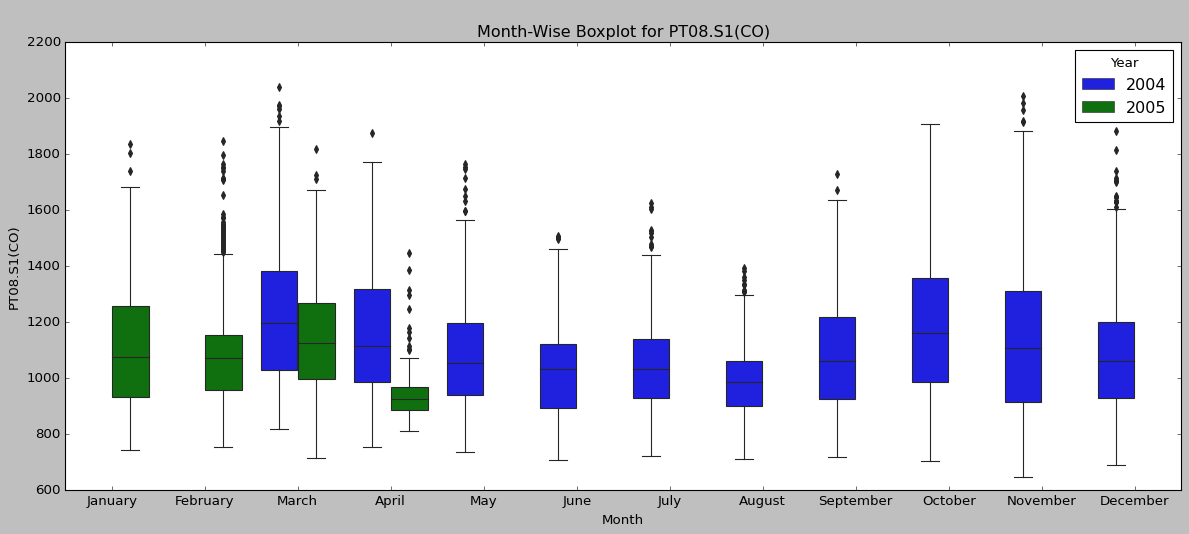

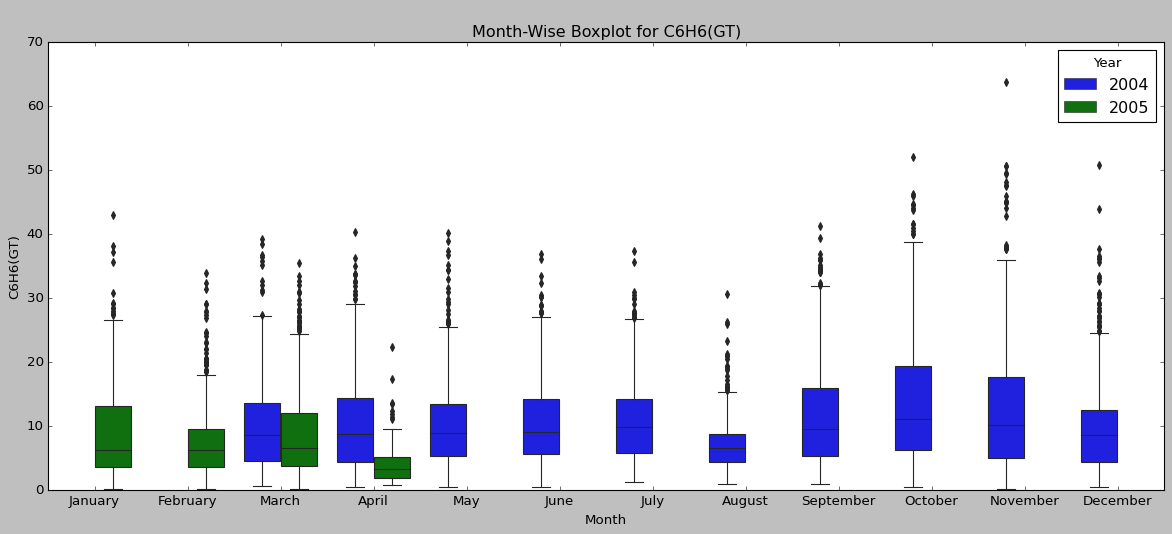

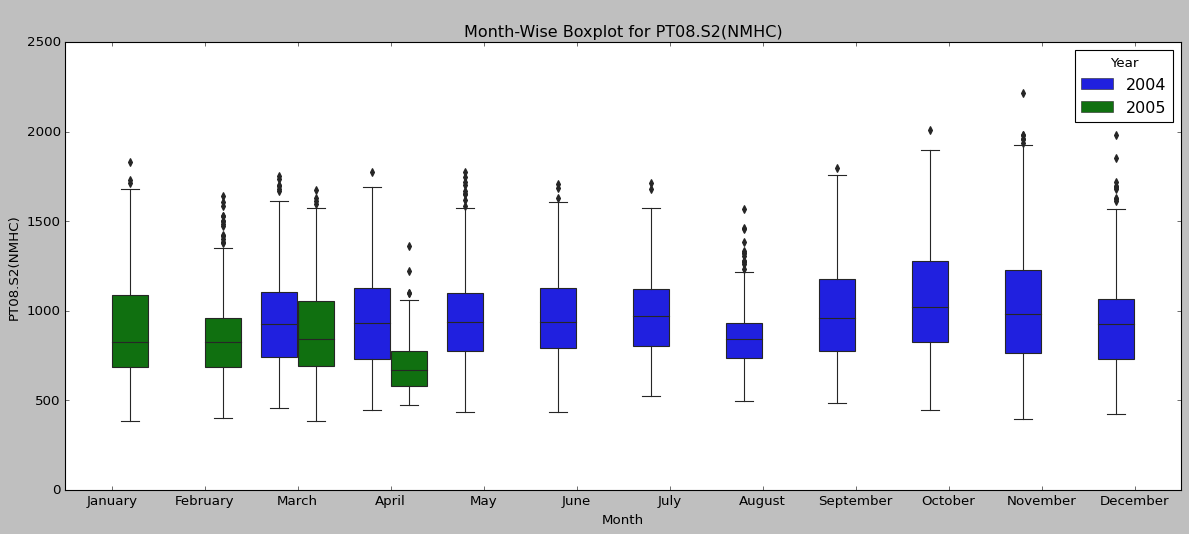

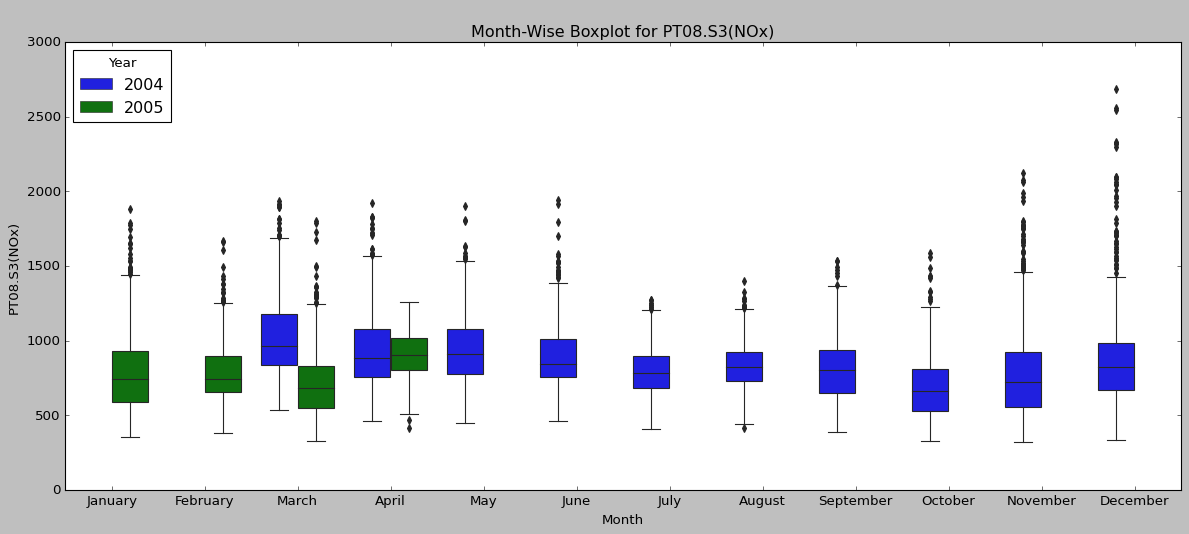

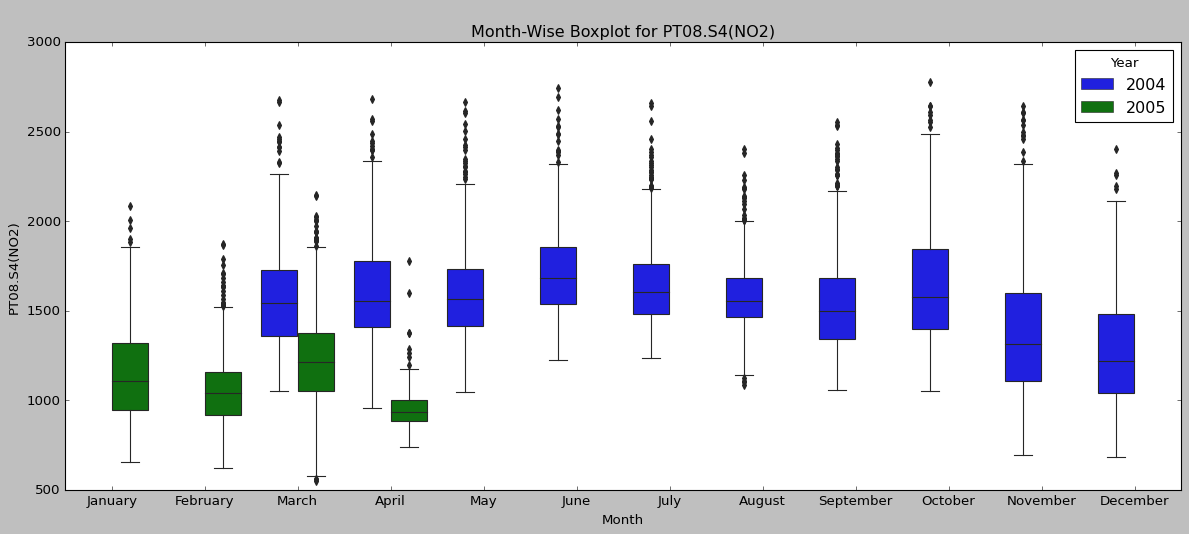

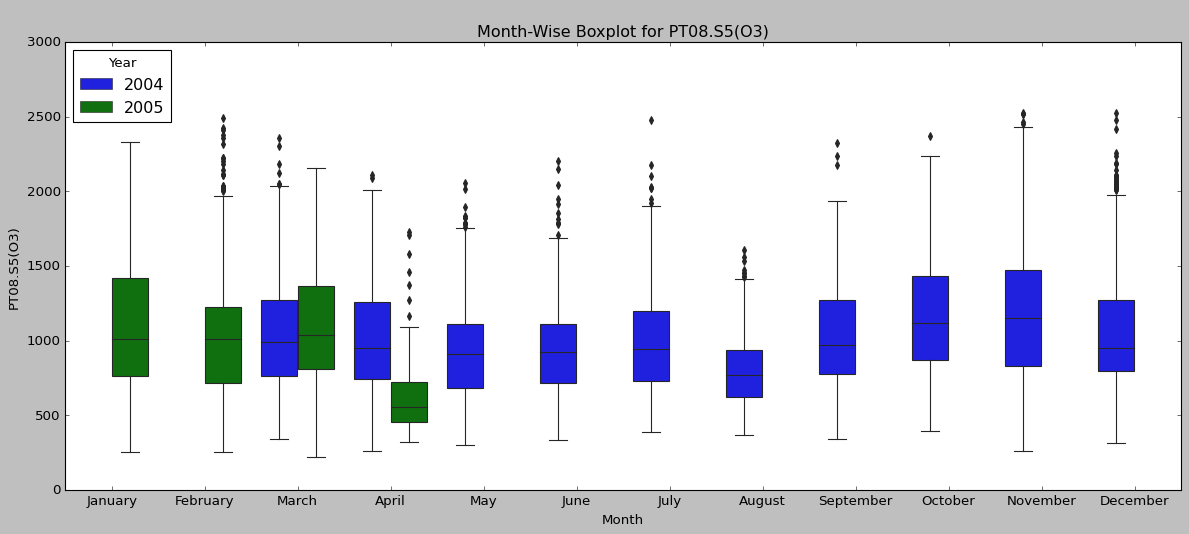

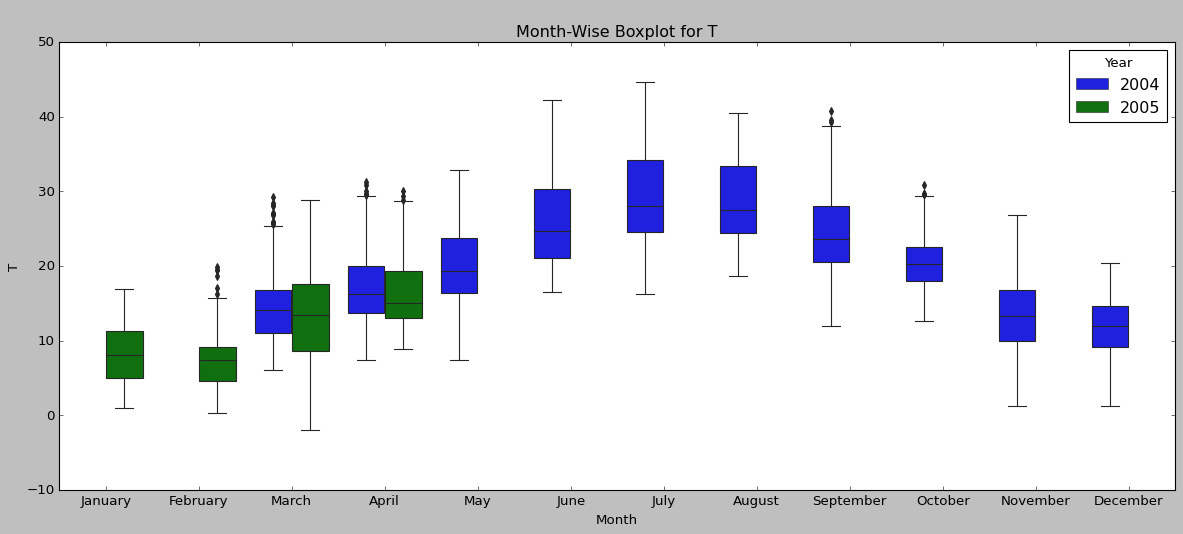

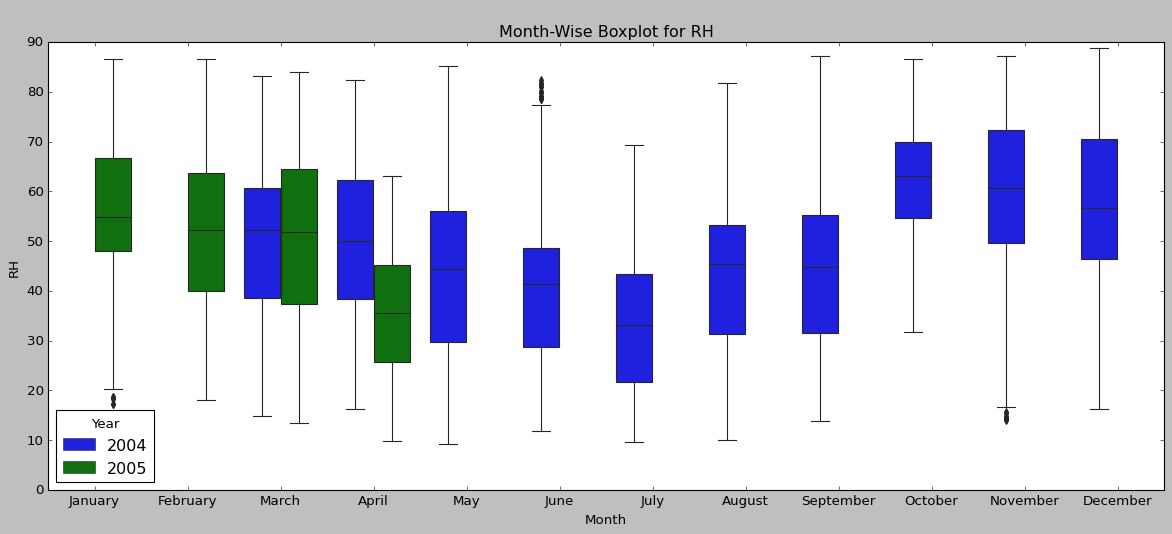

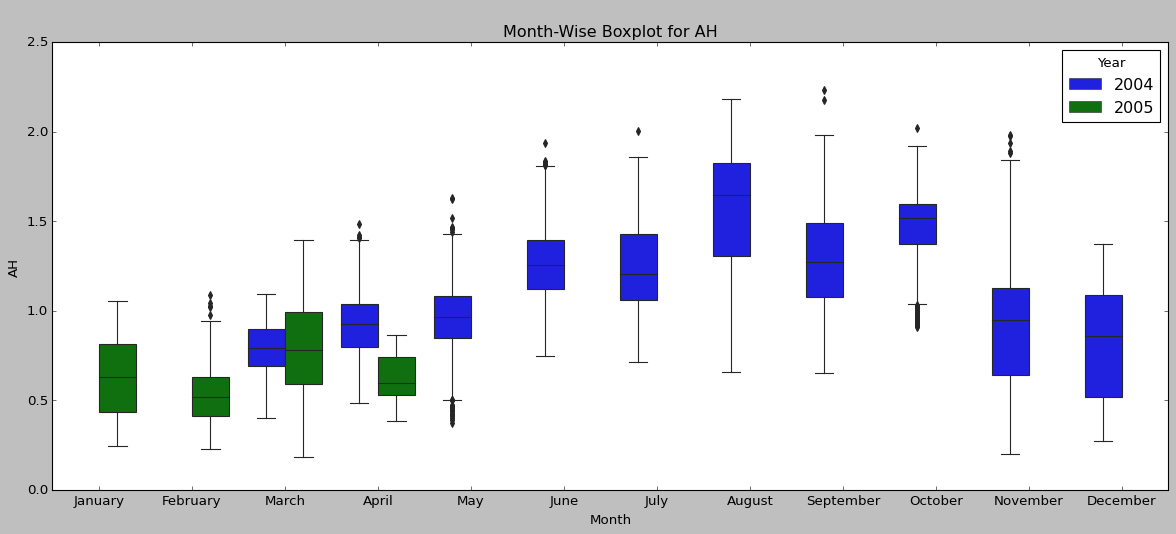

In [31]:
# S3.5: Create the box plot for month-wise concentrations of all the air pollutants, temperature and relative humidity. 
# Make sure that you split the boxplots for each month by the year. Use the 'classic' style this time.
for col in df.columns[1:-4]:
    plt.style.use('classic')
    plt.figure(figsize=(18,7))
    plt.title(f'\nMonth-Wise Boxplot for {col}')
    sns.boxplot(x='Month',y=col,hue='Year',data=df)
    plt.xticks(ticks=[i for i in range(12)],labels=list(months[-2:])+list(months[:-2]))
    plt.show()

Let's stop here. We have covered almost everything we need to know about customizing the `matplotlib` plots. In the next class, we will learn more types of plots and the concept of correlation.

---